### SC1015 DSAI Mini Project
>Part 2: Data Preparation (Resampling) + Exploratory Data Analysis

>In this section we will do general exploratory data analysis/visualization to gather relevant insights. Due to the different nature of the data (14) Numerical Columns for the Packets variables and (6) Categorical Data for the Flag variables, we will be breaking it into two parts where we will explore the best method to explore and visualize the different datatypes for relevant
insights.

>We will also be utilizing Resampling from sklearn.utils to adjust the volume and ratio of Malware Attack Dataframes for better visualization.

>Table of Contents:

>1.1: Exploratory Data Analysis (Numerical) 

>1.2: Insights of Exploratory Data Analysis (Numerical) 

>2.1: Exploratory Data Analysis (Categorical) 

>2.2: Insights of Exploratory Data Analysis (Categorical) 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.utils import resample
# Set default Seaborn style
sb.set()

### Importing the pickle files

In [2]:
aw_rawData = pd.read_pickle('aw_finalData.pickle')
sw_rawData = pd.read_pickle('sw_finalData.pickle')
sms_rawData = pd.read_pickle('sms_finalData.pickle')
b_rawData = pd.read_pickle('benign_Data.pickle')
aw_raw_not_encodeData = pd.read_pickle('aw_not_encodeData.pickle')
sw_raw_not_encodeData = pd.read_pickle('sw_not_encodeData.pickle')
sms_raw_not_encodeData = pd.read_pickle('sms_not_encodeData.pickle')

### Downsampling using resample from sklearn
>This is done to reduce the over density of the data given the volume of the rows within the dataframe

### The downsampling operation is performed in two steps. 
>In the first step, the majority and minority classes are separated into two different dataframes. The majority class is then downsampled by randomly selecting a subset of the samples without replacement to match the number of samples in the minority class.

>In the second step, the balanced dataset obtained from the first step is further downsampled. Both the majority and minority classes are divided into two different dataframes and downsampled independently.

>Finally, the downsampled majority and minority classes are concatenated to obtain the final balanced dataset. The resulting dataset has an equal number of samples for each class.

In [3]:
aw_raw_not_encodeData['Label'].value_counts()

Android_Adware    147443
Benign             23708
Name: Label, dtype: int64

In [4]:
# Separate majority and minority classes
df_minority_aw1 = aw_raw_not_encodeData[aw_raw_not_encodeData['Label']=='Benign']
df_majority_aw1 = aw_raw_not_encodeData[aw_raw_not_encodeData['Label']=='Android_Adware']

# Downsample majority class
df_majority_downsampled_aw1 = resample(df_majority_aw1, 
                                      replace=False,     # sample without replacement
                                      n_samples=len(df_minority_aw1),  # match minority n
                                      random_state=42) 

# Combine minority class with downsampled majority class
df_downsampled_aw1 = pd.concat([df_majority_downsampled_aw1, df_minority_aw1])
# Downsampling the over volume of data
df_minority_aw2 = df_downsampled_aw1[df_downsampled_aw1['Label']=='Benign']
df_majority_aw2 = df_downsampled_aw1[df_downsampled_aw1['Label']=='Android_Adware']
# Downsample majority 
df_majority_downsampled_aw2 = resample(df_majority_aw2, 
                                      replace=False,     
                                      n_samples=int(len(df_majority_aw2)*0.1), 
                                      random_state=42) 
# Downsample minority 
df_minority_downsampled_aw2= resample(df_minority_aw2, 
                                      replace=False,     
                                      n_samples=int(len(df_minority_aw2)*0.1), 
                                      random_state=42) 
aw_not_encodeData = pd.concat([df_majority_downsampled_aw2, df_minority_downsampled_aw2])
aw_not_encodeData['Label'].value_counts()

Android_Adware    2370
Benign            2370
Name: Label, dtype: int64

In [5]:
sw_raw_not_encodeData['Label'].value_counts()

Android_Scareware    117082
Benign                23708
Name: Label, dtype: int64

In [6]:
# Separate majority and minority classes
df_minority_sw1 = sw_raw_not_encodeData[sw_raw_not_encodeData['Label']=='Benign']
df_majority_sw1 = sw_raw_not_encodeData[sw_raw_not_encodeData['Label']=='Android_Scareware']

# Downsample majority class
df_majority_downsampled_sw1 = resample(df_majority_sw1, 
                                      replace=False,     # sample without replacement
                                      n_samples=len(df_minority_sw1),  # match minority n
                                      random_state=42) 

# Combine minority class with downsampled majority class
df_downsampled_sw1 = pd.concat([df_majority_downsampled_sw1, df_minority_sw1])
# Downsampling the over volume of data
df_minority_sw2 = df_downsampled_sw1[df_downsampled_sw1['Label']=='Benign']
df_majority_sw2 = df_downsampled_sw1[df_downsampled_sw1['Label']=='Android_Scareware']
# Downsample majority 
df_majority_downsampled_sw2 = resample(df_majority_sw2, 
                                      replace=False,     
                                      n_samples=int(len(df_majority_sw2)*0.1), 
                                      random_state=42) 
# Downsample minority 
df_minority_downsampled_sw2= resample(df_minority_sw2, 
                                      replace=False,     
                                      n_samples=int(len(df_minority_sw2)*0.1), 
                                      random_state=42) 
sw_not_encodeData  = pd.concat([df_majority_downsampled_sw2, df_minority_downsampled_sw2])
sw_not_encodeData['Label'].value_counts()

Android_Scareware    2370
Benign               2370
Name: Label, dtype: int64

In [7]:
sms_raw_not_encodeData = pd.read_pickle('sms_not_encodeData.pickle')
sms_raw_not_encodeData['Label'].value_counts()

Android_SMS_Malware    67396
Benign                 23708
Name: Label, dtype: int64

In [8]:
# Separate majority and minority classes
df_minority_sms1 = sms_raw_not_encodeData[sms_raw_not_encodeData['Label']=='Benign']
df_majority_sms1 = sms_raw_not_encodeData[sms_raw_not_encodeData['Label']=='Android_SMS_Malware']

# Downsample majority class
df_majority_downsampled_sms1 = resample(df_majority_sms1, 
                                      replace=False,     # sample without replacement
                                      n_samples=len(df_minority_sms1),  # match minority n
                                      random_state=42) 

# Combine minority class with downsampled majority class
df_downsampled_sms1 = pd.concat([df_majority_downsampled_sms1, df_minority_sms1])
# Downsampling the over volume of data
df_minority_sms2 = df_downsampled_sms1[df_downsampled_sms1['Label']=='Benign']
df_majority_sms2 = df_downsampled_sms1[df_downsampled_sms1['Label']=='Android_SMS_Malware']
# Downsample majority 
df_majority_downsampled_sms2 = resample(df_majority_sms2, 
                                      replace=False,     
                                      n_samples=int(len(df_majority_sms2)*0.1), 
                                      random_state=42) 
# Downsample minority 
df_minority_downsampled_sms2= resample(df_minority_sms2, 
                                      replace=False,     
                                      n_samples=int(len(df_minority_sms2)*0.1), 
                                      random_state=42) 
df_downsampled_sms = pd.concat([df_majority_downsampled_sms2, df_minority_downsampled_sms2])
sms_not_encodeData = pd.concat([df_majority_downsampled_sms2, df_minority_downsampled_sms2])
sms_not_encodeData['Label'].value_counts()

Android_SMS_Malware    2370
Benign                 2370
Name: Label, dtype: int64

### The resample process reduced the sheer volume in terms of row for the different DataFrames that will be visualized in the EDA process below in order to help with better visual clarity for method chosen.

### 1.1 Exploratory Data Analysis (Numerical): 

### Numerical Visualization using seaborn.boxplot

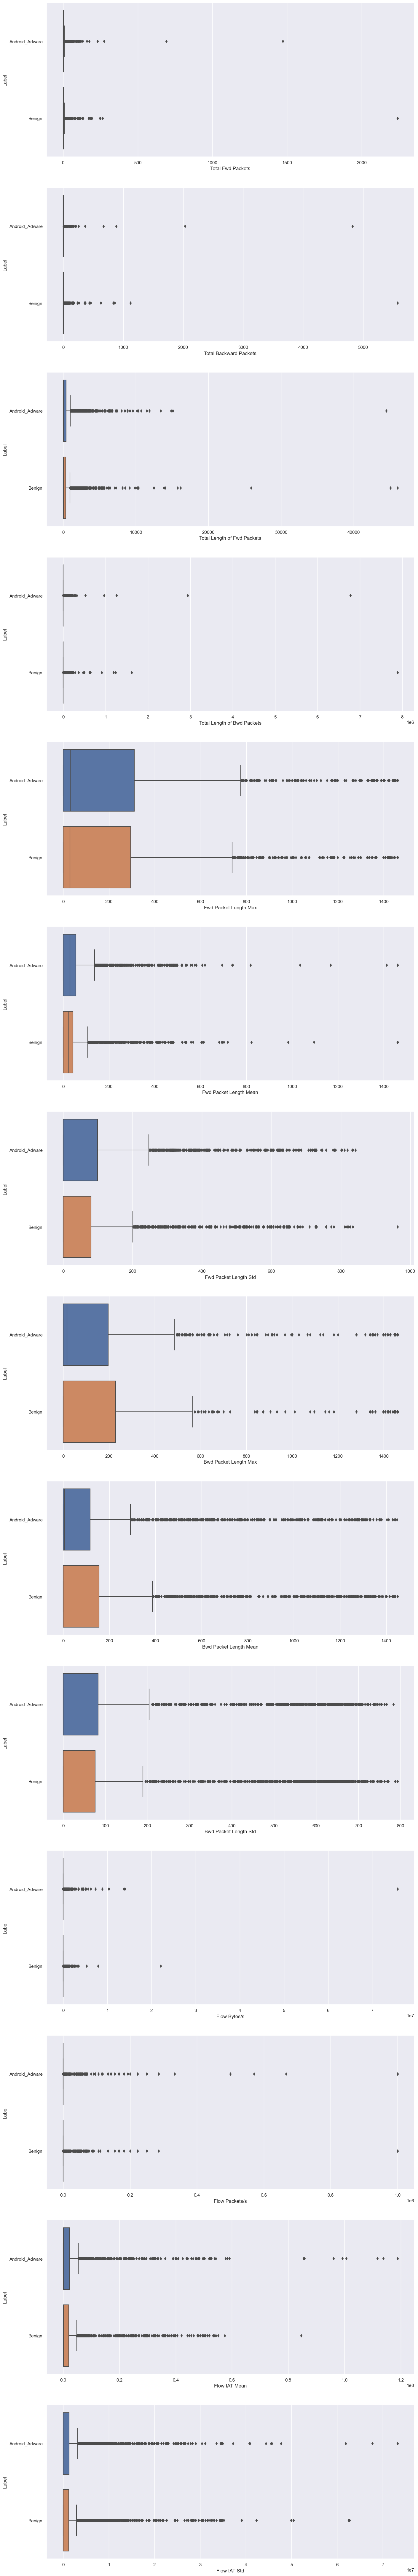

In [9]:
f, axes = plt.subplots(14, 1, figsize=(16, 4*28))

for i in range(14):
    sb.boxplot(data=aw_not_encodeData,x= aw_not_encodeData.iloc[:,i], y= aw_not_encodeData['Label'],orient='h', ax=axes[i])

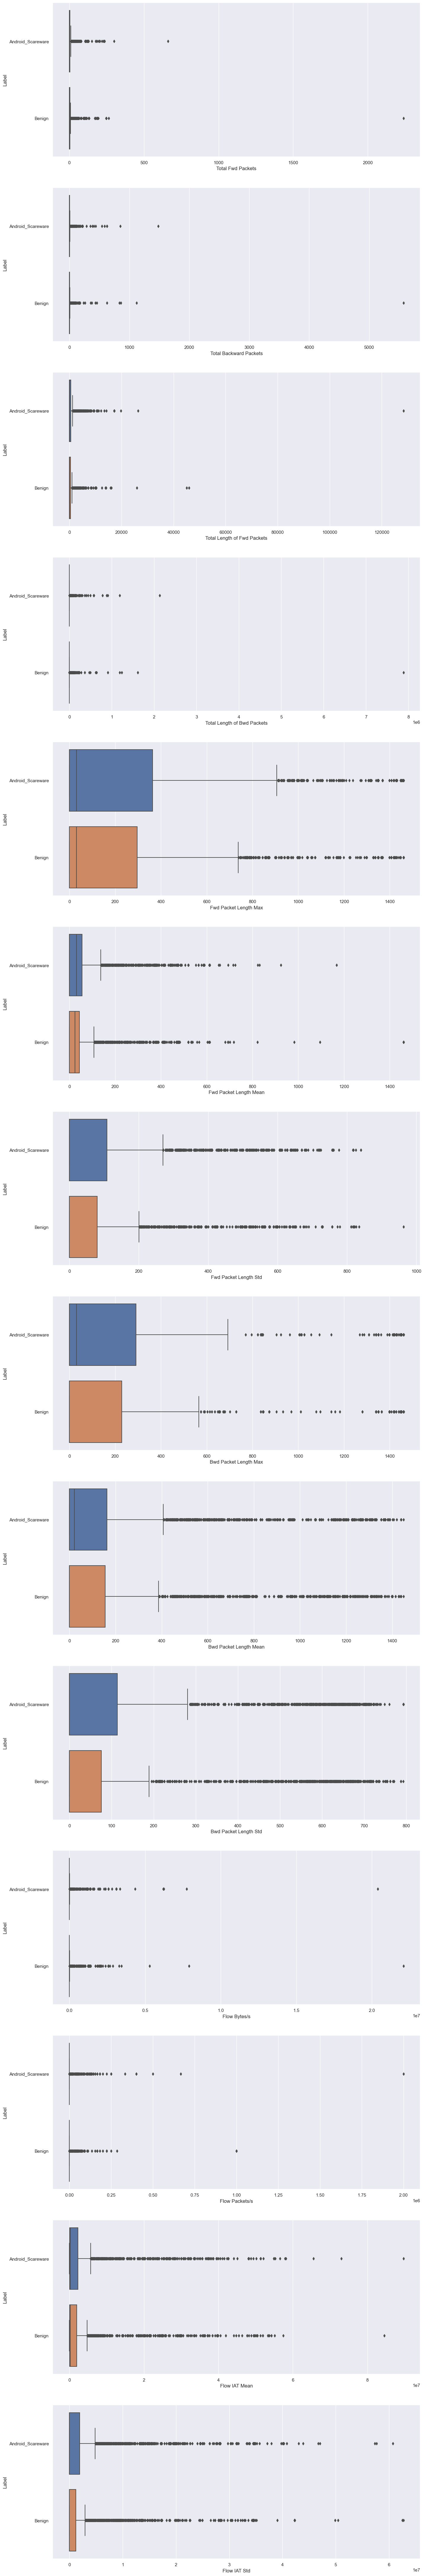

In [10]:
f, axes = plt.subplots(14, 1, figsize=(16, 4*28))

for i in range(14):
    sb.boxplot(data=sw_not_encodeData,x= sw_not_encodeData.iloc[:,i], y= sw_not_encodeData['Label'],orient='h', ax=axes[i])

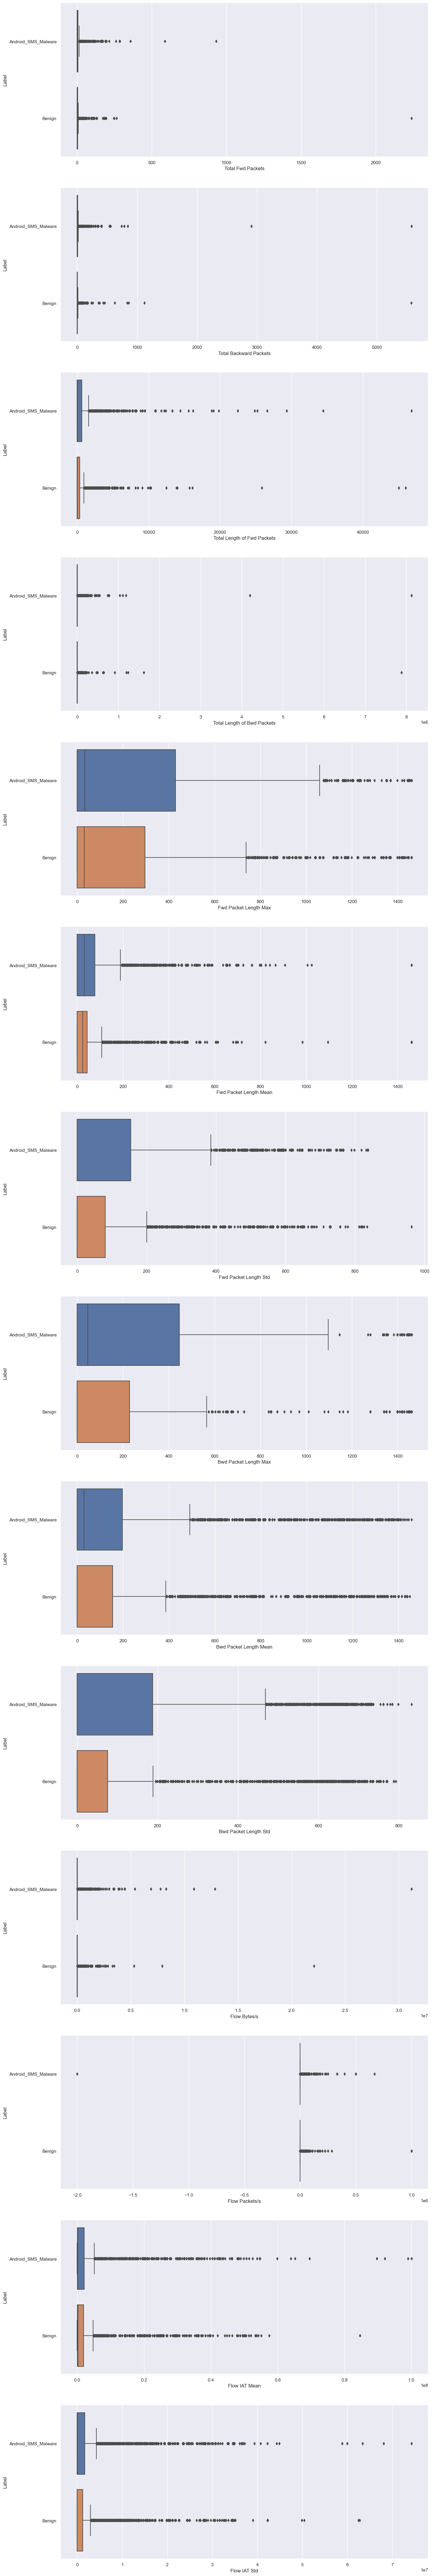

In [11]:
f, axes = plt.subplots(14, 1, figsize=(16, 4*28))

for i in range(14):
    sb.boxplot(data=sms_not_encodeData,x= sms_not_encodeData.iloc[:,i], y= sms_not_encodeData['Label'],orient='h', ax=axes[i])

### Numerical Visualization using seaborn.stripplot

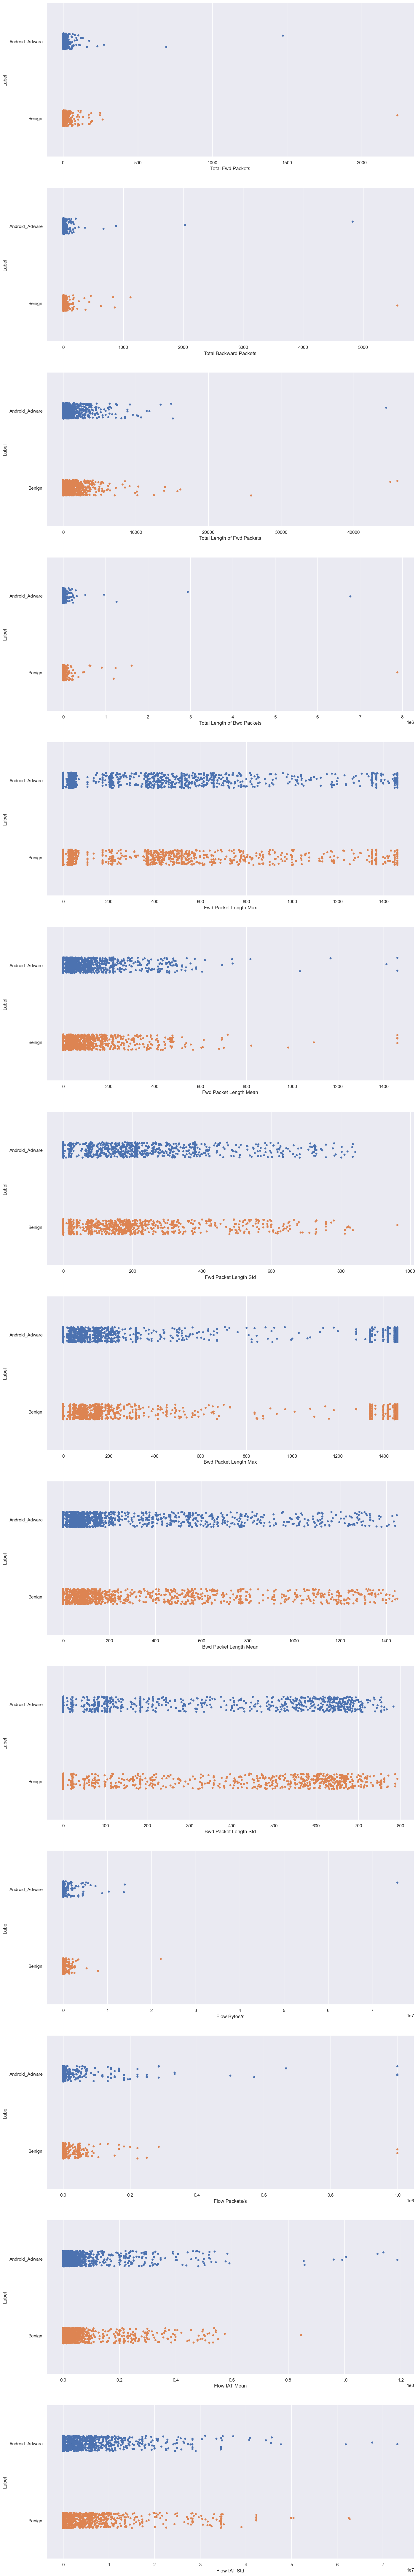

In [12]:
f, axes = plt.subplots(14, 1, figsize=(16, 4*28))

for i in range(14):
    sb.stripplot(data=aw_not_encodeData, x=aw_not_encodeData.iloc[:, i], y='Label', ax=axes[i])

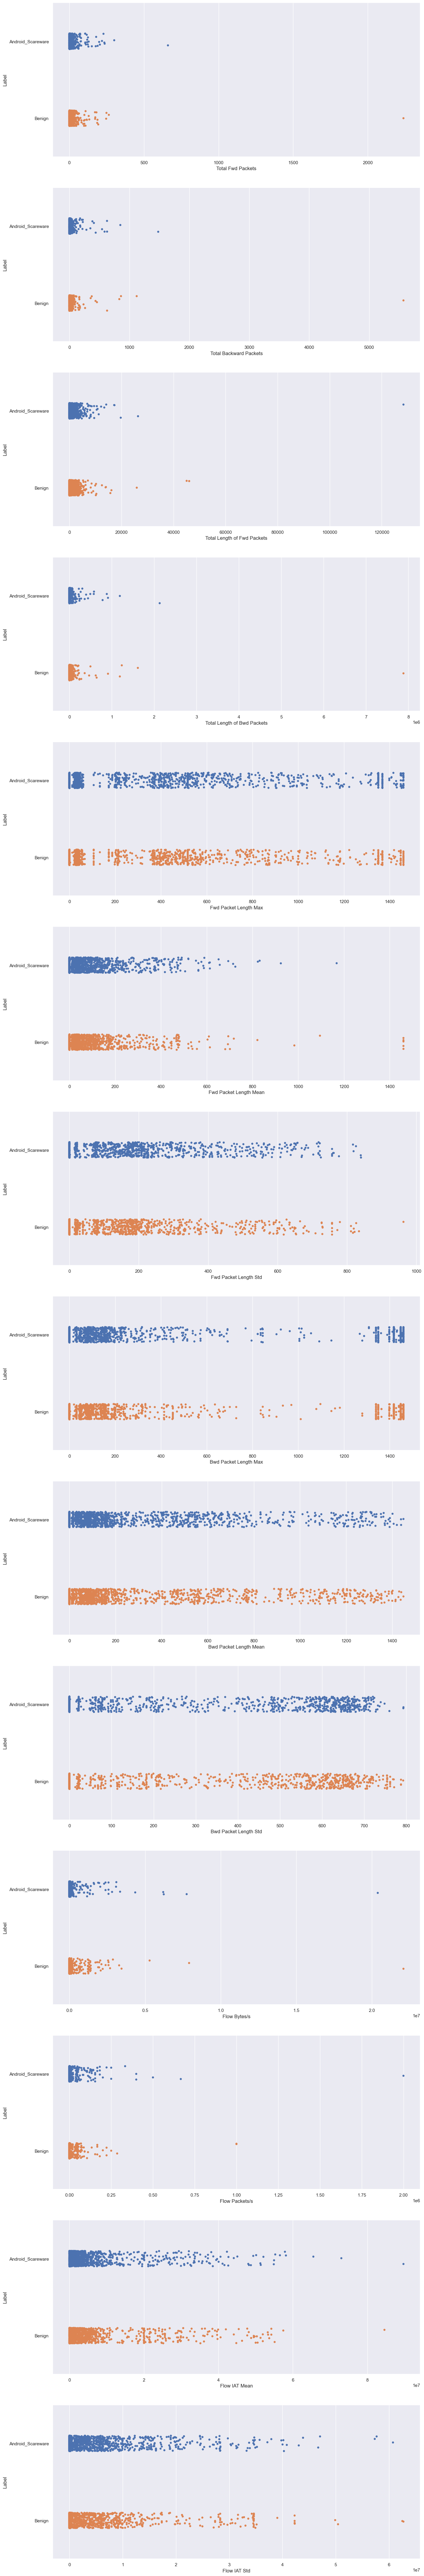

In [13]:
f, axes = plt.subplots(14, 1, figsize=(16, 4*28))

for i in range(14):
    sb.stripplot(data=sw_not_encodeData, x=sw_not_encodeData.iloc[:, i], y='Label', ax=axes[i])

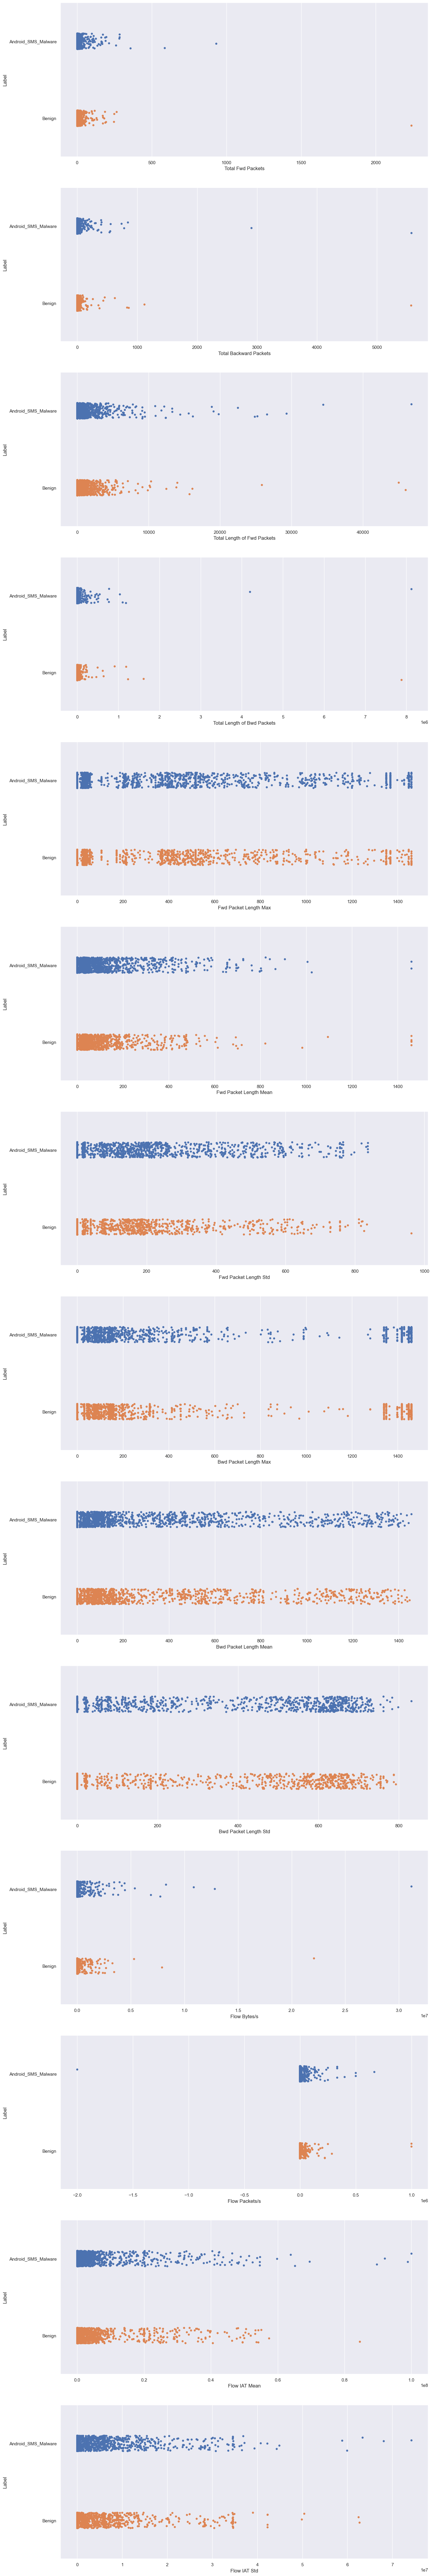

In [14]:
f, axes = plt.subplots(14, 1, figsize=(16, 4*28))

for i in range(14):
    sb.stripplot(data=sms_not_encodeData, x=sms_not_encodeData.iloc[:, i], y='Label', ax=axes[i])

In [15]:
positive_attack = [1]
negative_attack = [0]
aw_final_posData = aw_rawData[aw_rawData['Label'].isin(positive_attack)]
sw_final_posData = sw_rawData[sw_rawData['Label'].isin(positive_attack)]
sms_final_posData = sms_rawData[sms_rawData['Label'].isin(positive_attack)]
#any one of the dataframe can be used for the negative/'Benign' attacks as they all come from the same set of Benign data
final_negData = aw_rawData[aw_rawData['Label'].isin(negative_attack)]

In [16]:
aw_final_posData = pd.DataFrame(aw_final_posData[['Total Fwd Packets',
                                                  'Total Backward Packets',
                                                  'Total Length of Fwd Packets',
                                                  'Total Length of Bwd Packets',
                                                  'Fwd Packet Length Max',
                                                  'Fwd Packet Length Mean',
                                                  'Fwd Packet Length Std',
                                                  'Bwd Packet Length Max',
                                                  'Bwd Packet Length Mean',
                                                  'Bwd Packet Length Std',
                                                  'Flow Bytes/s',
                                                  'Flow Packets/s',
                                                  'Flow IAT Mean',
                                                  'Flow IAT Std',
                                                  'Label']])
aw_pos_Data = aw_final_posData.describe()

In [17]:
sw_final_posData = pd.DataFrame(sw_final_posData[['Total Fwd Packets',
                                                  'Total Backward Packets',
                                                  'Total Length of Fwd Packets',
                                                  'Total Length of Bwd Packets',
                                                  'Fwd Packet Length Max',
                                                  'Fwd Packet Length Mean',
                                                  'Fwd Packet Length Std',
                                                  'Bwd Packet Length Max',
                                                  'Bwd Packet Length Mean',
                                                  'Bwd Packet Length Std',
                                                  'Flow Bytes/s',
                                                  'Flow Packets/s',
                                                  'Flow IAT Mean',
                                                  'Flow IAT Std',
                                                  'Label']])
sw_pos_Data = sw_final_posData.describe()

In [18]:
sms_final_posData = pd.DataFrame(sms_final_posData[['Total Fwd Packets',
                                                    'Total Backward Packets',
                                                    'Total Length of Fwd Packets',
                                                    'Total Length of Bwd Packets',
                                                    'Fwd Packet Length Max',
                                                    'Fwd Packet Length Mean',
                                                    'Fwd Packet Length Std',
                                                    'Bwd Packet Length Max',
                                                    'Bwd Packet Length Mean',
                                                    'Bwd Packet Length Std',
                                                    'Flow Bytes/s',
                                                    'Flow Packets/s',
                                                    'Flow IAT Mean',
                                                    'Flow IAT Std',
                                                    'Label']])
sms_pos_Data = sms_final_posData.describe()

In [19]:
final_negData = pd.DataFrame(final_negData[['Total Fwd Packets',
                                            'Total Backward Packets',
                                            'Total Length of Fwd Packets',
                                            'Total Length of Bwd Packets',
                                            'Fwd Packet Length Max',
                                            'Fwd Packet Length Mean',
                                            'Fwd Packet Length Std',
                                            'Bwd Packet Length Max',
                                            'Bwd Packet Length Mean',
                                            'Bwd Packet Length Std',
                                            'Flow Bytes/s',
                                            'Flow Packets/s',
                                            'Flow IAT Mean',
                                            'Flow IAT Std',
                                            'Label']])
neg_Data = final_negData.describe()

In [20]:
# set options to show all columns
pd.set_option('display.max_columns', None)
aw_compared = aw_pos_Data.compare(neg_Data)
aw_compared.head(2)

Total Fwd Packets              Total Backward Packets                \
                   self        other                   self         other   
count      147443.00000  23708.00000          147443.000000  23708.000000   
mean            6.96773      7.45318              10.504256     10.372406   

      Total Length of Fwd Packets               Total Length of Bwd Packets  \
                             self         other                        self   
count               147443.000000  23708.000000               147443.000000   
mean                   511.270457    623.539944                11811.678459   

                    Fwd Packet Length Max                \
              other                  self         other   
count  23708.000000         147443.000000  23708.000000   
mean   11084.518433            193.415944    205.577948   

      Fwd Packet Length Mean               Fwd Packet Length Std  \
                        self         other                  self   
count          147443.000000  23708.000000          147443.00000   
mean               56.202451     54.926314              73.60263   

                    Bwd Packet Length Max                \
              other                  self         other   
count  23708.000000         147443.000000  23708.000000   
mean      74.346697            286.018007    336.704614   

      Bwd Packet Length Mean              Bwd Packet Length Std                \
                        self        other                  self         other   
count          147443.000000  23708.00000         147443.000000  23708.000000   
mean              150.964758    186.37479            110.678859    127.358804   

        Flow Bytes/s               Flow Packets/s               Flow IAT Mean  \
                self         other           self         other          self   
count  147443.000000  23708.000000  147443.000000  23708.000000  1.474430e+05   
mean    93858.784128  59607.087897    6164.789468   3756.370108  3.109219e+06   

                     Flow IAT Std                   Label           
              other          self         other      self    other  
count  2.370800e+04  1.474430e+05  2.370800e+04  147443.0  23708.0  
mean   2.942918e+06  2.057666e+06  2.450321e+06       1.0      0.0

In [21]:
sw_compared = sw_pos_Data.compare(neg_Data)
sw_compared.head(2)

Total Fwd Packets              Total Backward Packets                \
                   self        other                   self         other   
count      117082.00000  23708.00000          117082.000000  23708.000000   
mean            8.06949      7.45318              22.271075     10.372406   

      Total Length of Fwd Packets               Total Length of Bwd Packets  \
                             self         other                        self   
count               117082.000000  23708.000000               117082.000000   
mean                   817.176109    623.539944                11664.998128   

                    Fwd Packet Length Max                \
              other                  self         other   
count  23708.000000         117082.000000  23708.000000   
mean   11084.518433            227.944261    205.577948   

      Fwd Packet Length Mean               Fwd Packet Length Std  \
                        self         other                  self   
count          117082.000000  23708.000000         117082.000000   
mean               60.464556     54.926314             80.626012   

                    Bwd Packet Length Max                \
              other                  self         other   
count  23708.000000         117082.000000  23708.000000   
mean      74.346697            337.822509    336.704614   

      Bwd Packet Length Mean              Bwd Packet Length Std                \
                        self        other                  self         other   
count          117082.000000  23708.00000         117082.000000  23708.000000   
mean              178.202041    186.37479            129.642171    127.358804   

        Flow Bytes/s               Flow Packets/s               Flow IAT Mean  \
                self         other           self         other          self   
count  117082.000000  23708.000000  117082.000000  23708.000000  1.170820e+05   
mean    72372.858997  59607.087897    5109.420777   3756.370108  3.108338e+06   

                     Flow IAT Std                   Label           
              other          self         other      self    other  
count  2.370800e+04  1.170820e+05  2.370800e+04  117082.0  23708.0  
mean   2.942918e+06  2.586398e+06  2.450321e+06       1.0      0.0

In [22]:
sms_compared = sms_pos_Data.compare(neg_Data)
sms_compared.head(2)

Total Fwd Packets              Total Backward Packets                \
                   self        other                   self         other   
count      67396.000000  23708.00000           67396.000000  23708.000000   
mean           7.341934      7.45318               9.630023     10.372406   

      Total Length of Fwd Packets               Total Length of Bwd Packets  \
                             self         other                        self   
count                67396.000000  23708.000000                67396.000000   
mean                   828.608285    623.539944                 9596.518369   

                    Fwd Packet Length Max                \
              other                  self         other   
count  23708.000000          67396.000000  23708.000000   
mean   11084.518433            243.129221    205.577948   

      Fwd Packet Length Mean               Fwd Packet Length Std  \
                        self         other                  self   
count           67396.000000  23708.000000          67396.000000   
mean               67.405627     54.926314             92.394169   

                    Bwd Packet Length Max                \
              other                  self         other   
count  23708.000000          67396.000000  23708.000000   
mean      74.346697            359.660254    336.704614   

      Bwd Packet Length Mean              Bwd Packet Length Std                \
                        self        other                  self         other   
count           67396.000000  23708.00000           67396.00000  23708.000000   
mean              183.921161    186.37479             144.19319    127.358804   

       Flow Bytes/s               Flow Packets/s               Flow IAT Mean  \
               self         other           self         other          self   
count  67396.000000  23708.000000   67396.000000  23708.000000  6.739600e+04   
mean   91155.114859  59607.087897    5308.998027   3756.370108  3.520649e+06   

                     Flow IAT Std                  Label           
              other          self         other     self    other  
count  2.370800e+04  6.739600e+04  2.370800e+04  67396.0  23708.0  
mean   2.942918e+06  2.948888e+06  2.450321e+06      1.0      0.0

### 1.2: Insights of Exploratory Data Analysis (Numerical):
>To preface we must acknowledge that using graphical representation for such a large volume of (Numerical) data against (Categorical) has the downside of poor visual clarity even after downscaling of the rows within the DataFrames has been done in hopes to achieve the better visual clarity.

>We have chosen boxplots and stripplot in this case to best showcase our results for general distribution to best visualize the downsampled data.

>The .describe() function is also utilized on the raw data is to showcase the different (Numerical) variables for the types of Malware Attacks vs Benign. 

>Insights from the Boxplots and Stripplot:
>>As shown in the boxplot and stripplot, there are many outliers in the values, however the value that standout the most visually would be the ['Backward Packet Length Max'] for Android_SMS_Malware: Where the outliers have a large spread which is also reflected in their std value.

>Significant observation difference of around 40% to 30%  from the (mean) value result of .compare() function on the .describe() results of the raw Numerical Dataframes for the types of Malware Attacks vs Benign:
>> Android_Adware vs Benign:
>>>Mean value of Flow Bytes/s = 93858.784128 : 59607.087897

>>>Mean value of Flow Packets/s = 6164.789468 : 3756.370108

>>>Mean value of Flow IAT Std = 2.057666 :	2.450321

>> Android_Scareware vs Benign:
>>>Mean value of Total Backward Packets = 22.271075	: 10.372406

>>>Mean value of Total Length of Fwd Packets = 817.176109	623.539944

>>>Mean value of Flow Packets/s = 5109.420777 : 3756.370108

>> Android_SMS_Malware vs Benign:
>>>Mean value of Total Length of Fwd Packets =  828.608285 : 623.539944

>>>Mean value of Flow Bytes/s =  91155.114859 : 59607.087897

>>>Mean value of Flow Packets/s = 5308.998027 :	3756.370108

>These insights will be further developed into potential hypothesis/insights in the prediction accuracy/ when at the machine learning model stage. Such as the feature importance rankings, we can take a look back at the Significant observation difference later on in Part 4: Machine Learning

>Though the boxplots visually show a large amount of outliers reflected throughout all the (Numerical) data, we won't remove them as they are important for anomaly detection.

### 2.1 Exploratory Data Analysis (Categorical):

In [23]:
aw_cateData = pd.DataFrame(aw_not_encodeData[['FIN Flag Count',
                                              'SYN Flag Count',
                                              'RST Flag Count',
                                              'PSH Flag Count',
                                              'ACK Flag Count',
                                              'URG Flag Count',
                                              'Label']])
aw_cateData['Label'].value_counts()

Android_Adware    2370
Benign            2370
Name: Label, dtype: int64

In [24]:
sw_cateData = pd.DataFrame(sw_not_encodeData[['FIN Flag Count',
                                              'SYN Flag Count',
                                              'RST Flag Count',
                                              'PSH Flag Count',
                                              'ACK Flag Count',
                                              'URG Flag Count',
                                              'Label']])
sw_cateData['Label'].value_counts()

Android_Scareware    2370
Benign               2370
Name: Label, dtype: int64

In [25]:
sms_cateData = pd.DataFrame(sms_not_encodeData[['FIN Flag Count',
                                                'SYN Flag Count',
                                                'RST Flag Count',
                                                'PSH Flag Count',
                                                'ACK Flag Count',
                                                'URG Flag Count',
                                                'Label']])
sms_cateData['Label'].value_counts()

Android_SMS_Malware    2370
Benign                 2370
Name: Label, dtype: int64

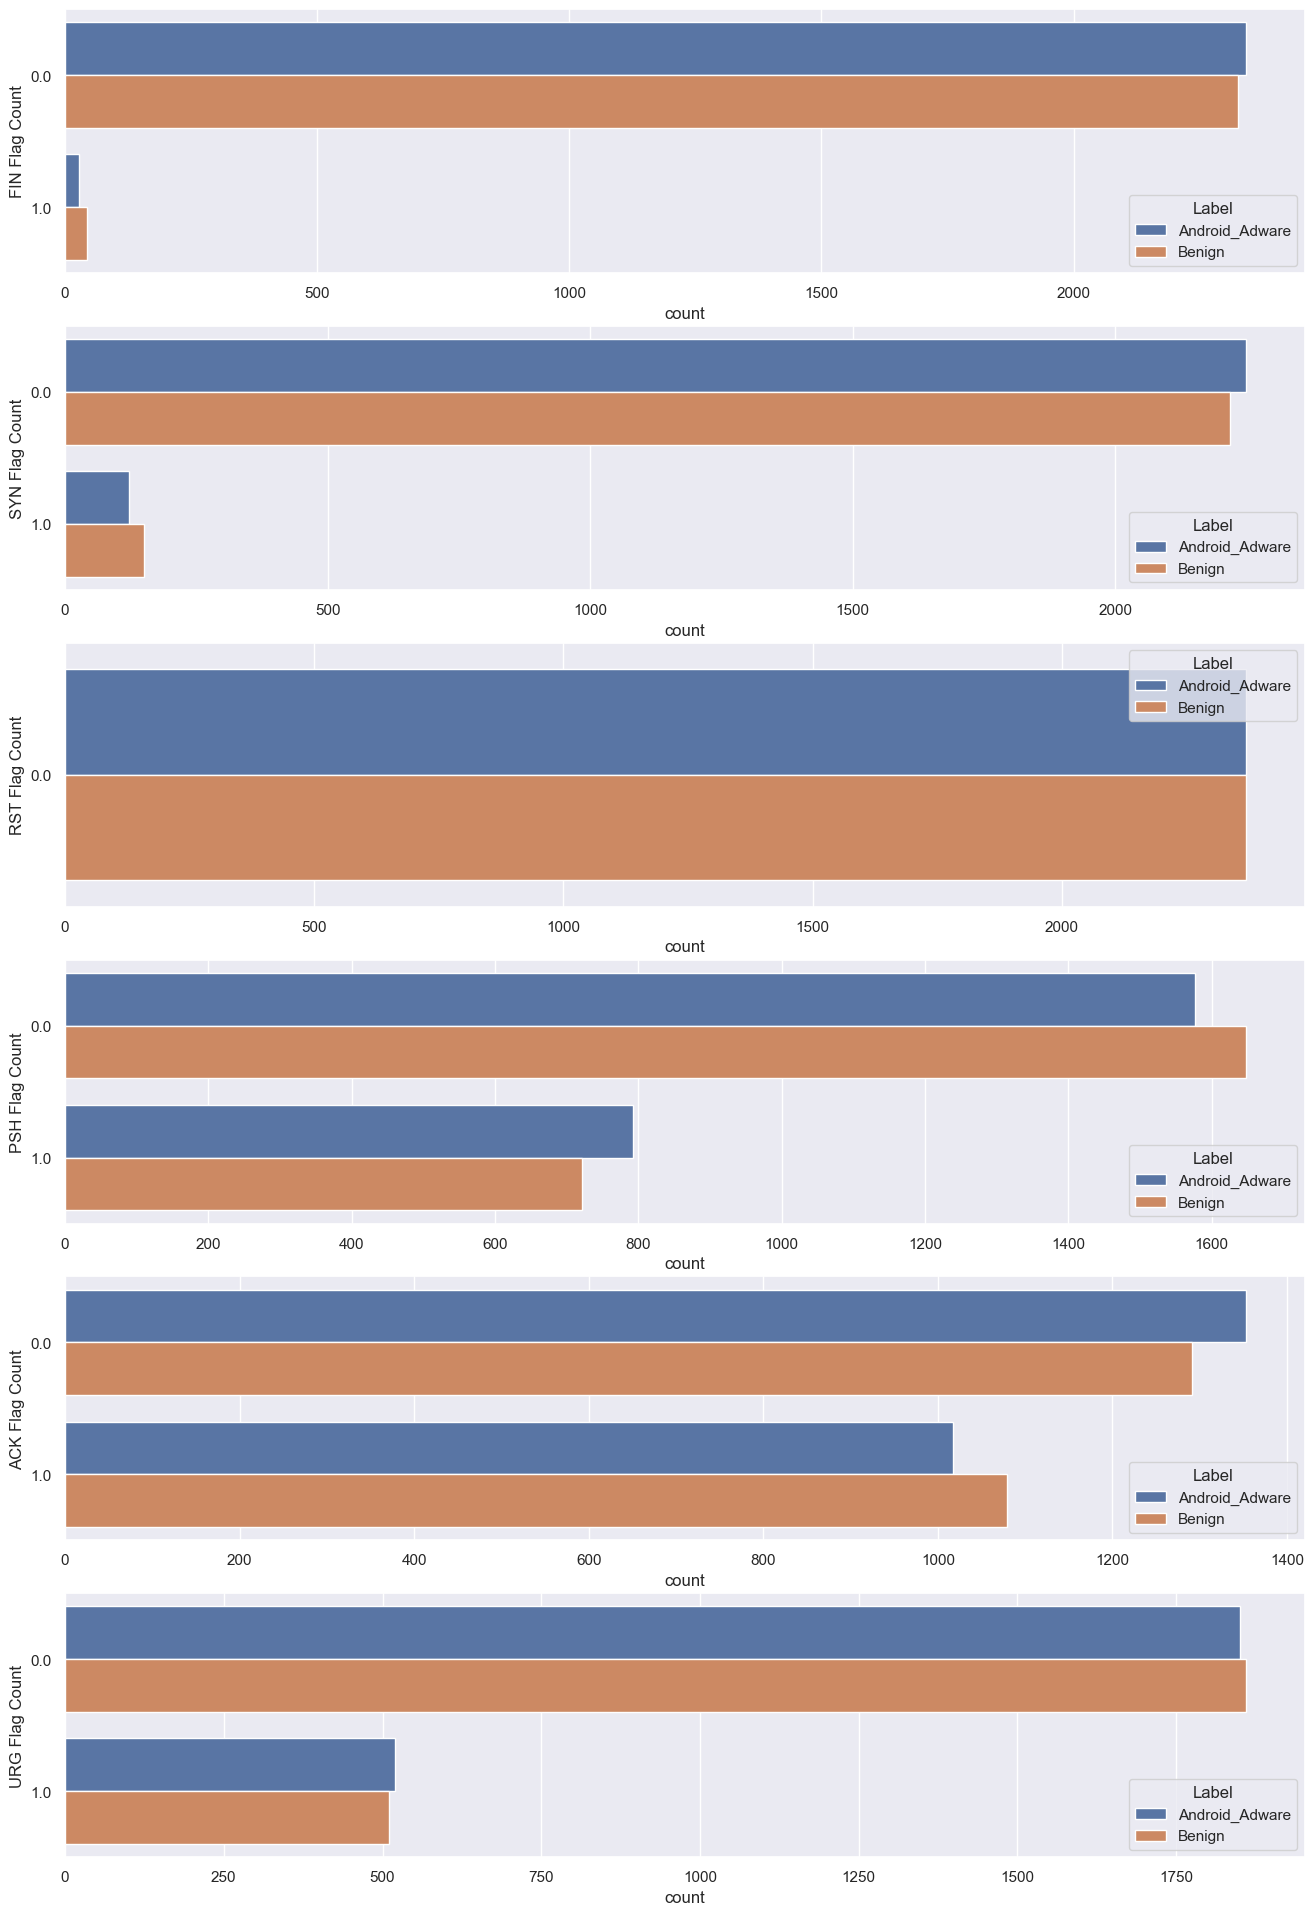

In [26]:
#Countplot for Flag Counts of Android_Adware vs Benign
f, axes = plt.subplots(6, 1, figsize=(16, 4*6))

for i in range(6):
    sb.countplot(data=aw_cateData, y=aw_cateData.columns[i], hue=aw_cateData['Label'], orient='h', ax=axes[i])

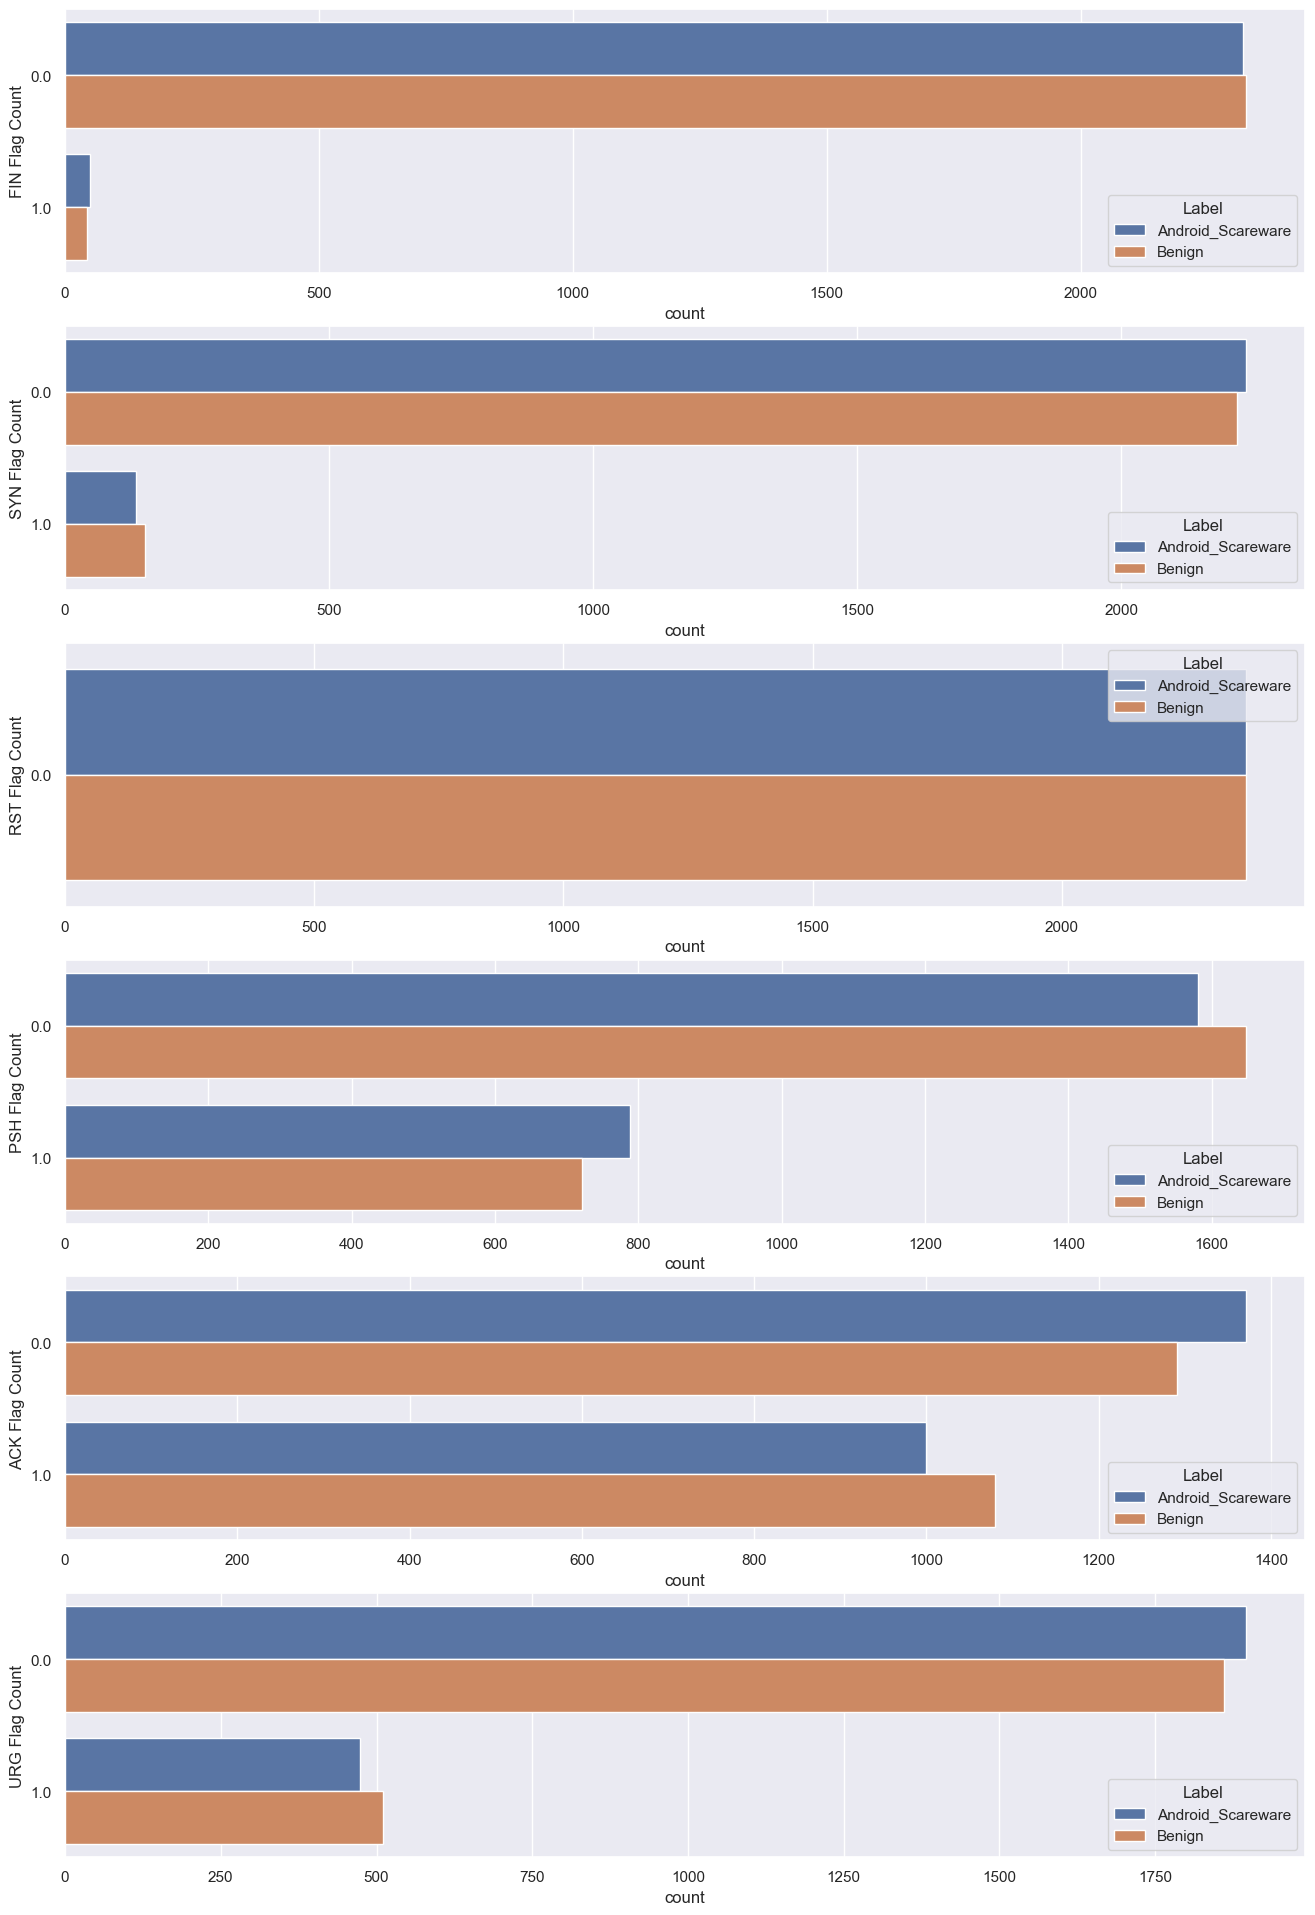

In [27]:
#Countplot for Flag Counts of Android_Scareware vs Benign
f, axes = plt.subplots(6, 1, figsize=(16, 4*6))

for i in range(6):
    sb.countplot(data=sw_cateData, y=sw_cateData.columns[i], hue=sw_cateData['Label'], orient='h', ax=axes[i])

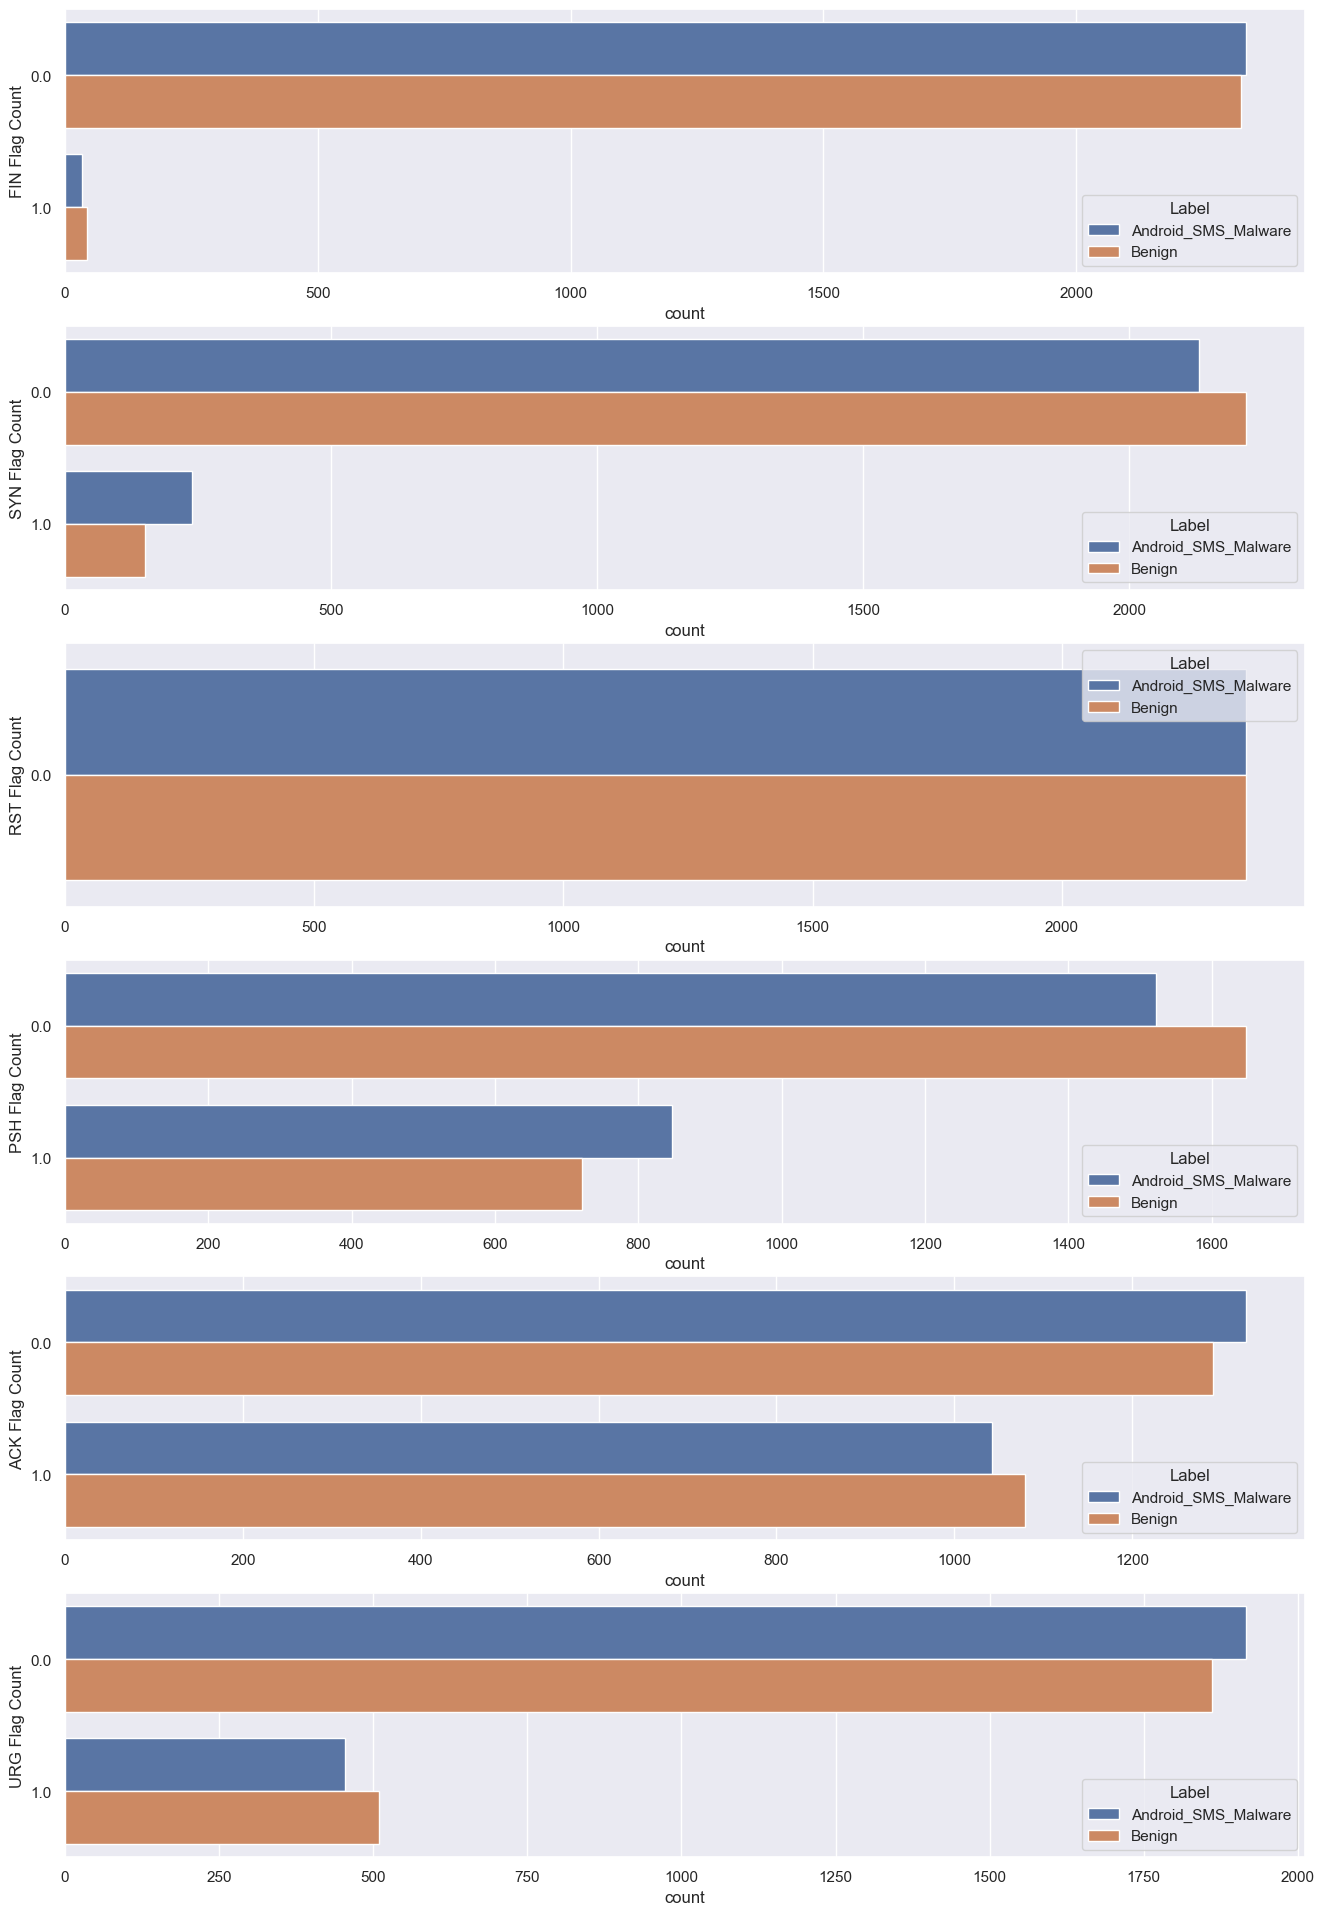

In [28]:
#Countplot for Flag Counts of Android_SMS_Malware vs Benign
f, axes = plt.subplots(6, 1, figsize=(16, 4*6))

for i in range(6):
    sb.countplot(data=sms_cateData, y=sms_cateData.columns[i], hue=sms_cateData['Label'], orient='h', ax=axes[i])

In [29]:
aw_cateData.describe()

FIN Flag Count  SYN Flag Count  RST Flag Count  PSH Flag Count  \
count      4740.00000     4740.000000          4740.0     4740.000000   
mean          0.01519        0.057384             0.0        0.319620   
std           0.12232        0.232599             0.0        0.466379   
min           0.00000        0.000000             0.0        0.000000   
25%           0.00000        0.000000             0.0        0.000000   
50%           0.00000        0.000000             0.0        0.000000   
75%           0.00000        0.000000             0.0        1.000000   
max           1.00000        1.000000             0.0        1.000000   

       ACK Flag Count  URG Flag Count  
count     4740.000000     4740.000000  
mean         0.442194        0.217300  
std          0.496700        0.412452  
min          0.000000        0.000000  
25%          0.000000        0.000000  
50%          0.000000        0.000000  
75%          1.000000        0.000000  
max          1.000000        1.000000

In [30]:
sw_cateData.describe()

FIN Flag Count  SYN Flag Count  RST Flag Count  PSH Flag Count  \
count     4740.000000     4740.000000          4740.0     4740.000000   
mean         0.019831        0.060127             0.0        0.318776   
std          0.139435        0.237746             0.0        0.466051   
min          0.000000        0.000000             0.0        0.000000   
25%          0.000000        0.000000             0.0        0.000000   
50%          0.000000        0.000000             0.0        0.000000   
75%          0.000000        0.000000             0.0        1.000000   
max          1.000000        1.000000             0.0        1.000000   

       ACK Flag Count  URG Flag Count  
count     4740.000000     4740.000000  
mean         0.438397        0.207595  
std          0.496243        0.405628  
min          0.000000        0.000000  
25%          0.000000        0.000000  
50%          0.000000        0.000000  
75%          1.000000        0.000000  
max          1.000000        1.000000

In [31]:
sms_cateData.describe()

FIN Flag Count  SYN Flag Count  RST Flag Count  PSH Flag Count  \
count     4740.000000     4740.000000          4740.0     4740.000000   
mean         0.016456        0.082278             0.0        0.331013   
std          0.127233        0.274818             0.0        0.470627   
min          0.000000        0.000000             0.0        0.000000   
25%          0.000000        0.000000             0.0        0.000000   
50%          0.000000        0.000000             0.0        0.000000   
75%          0.000000        0.000000             0.0        1.000000   
max          1.000000        1.000000             0.0        1.000000   

       ACK Flag Count  URG Flag Count  
count     4740.000000     4740.000000  
mean         0.447468        0.203376  
std          0.497285        0.402552  
min          0.000000        0.000000  
25%          0.000000        0.000000  
50%          0.000000        0.000000  
75%          1.000000        0.000000  
max          1.000000        1.000000

### The RST Flag Count always has a mean value of 0 for all 3 of the Categorical Dataframes.

### 2.2: Insights of Exploratory Data Analysis (Categorical):

### Insights:
>To preface we must acknowledge that using graphical representation for such a large volume of data its downsides in terms of visual representation. However due to the caterogical nature of this part of data analysis we are able to use some useful tools in seaborn to visualize the downsampled data.

>Due to the binary nature of the data variables where the values are '1' or '0' for all the flags as well as the categorical ['Label'], we utilized the countplot function in seaborn to best visualize the categorical data.

>Key insight: The RST flag count for all the different types of Malware attacks including Benign can be omitted in the machine learning model stage as it is always not triggered irregardless of the ['Label'].